# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [10]:
import pandas as pd

# I would dummify sex, year, island, and species

In [1]:
from palmerpenguins import load_penguins
df = load_penguins()
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


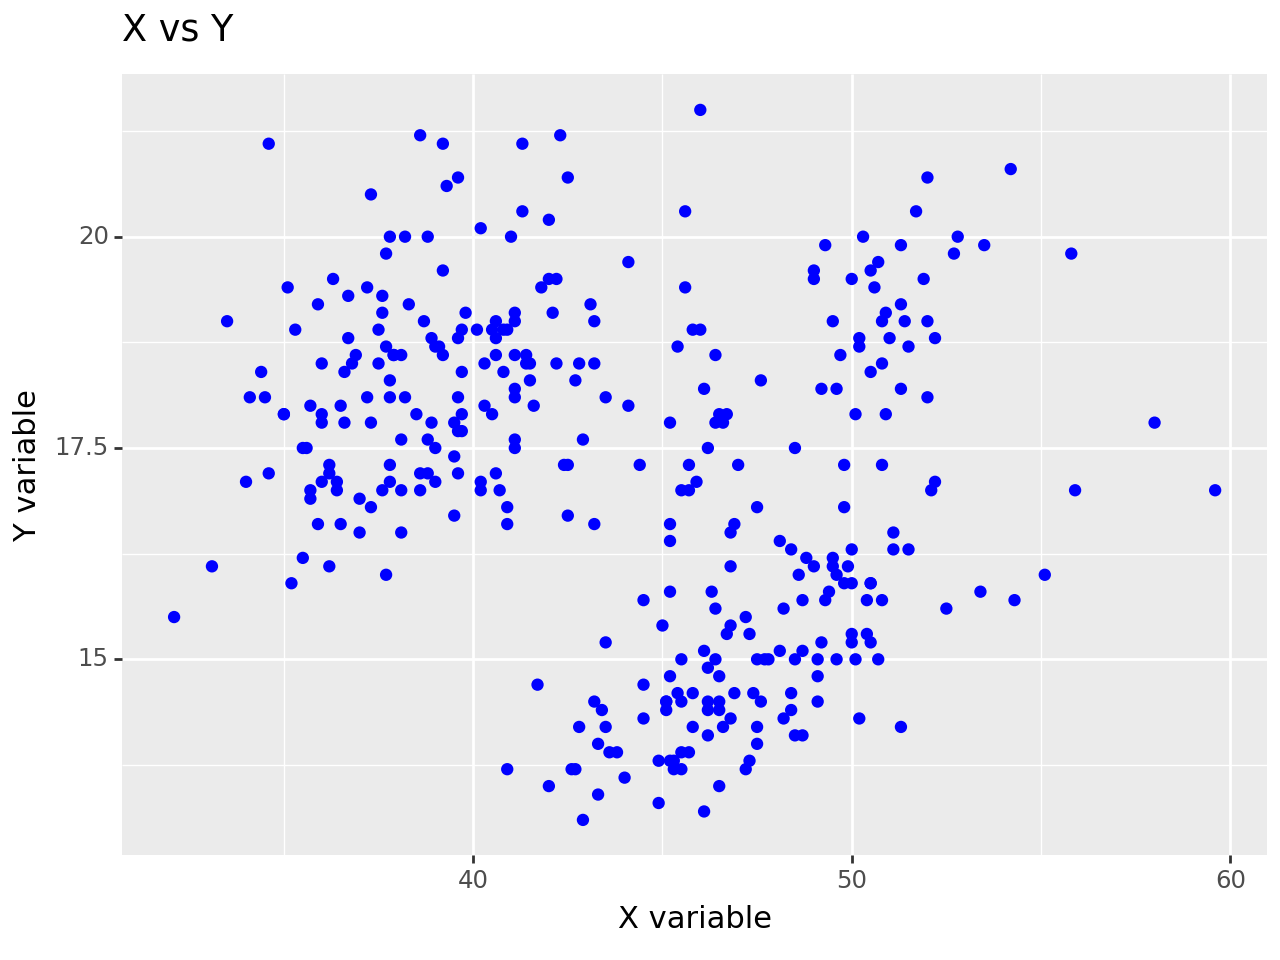

<Figure Size: (640 x 480)>

In [2]:
#finding the rigt model via plotting
import plotnine as p9
from plotnine import ggplot, aes, geom_point, theme_light, ggtitle, xlab, ylab
y = df['bill_depth_mm']
X = df['bill_length_mm']

(ggplot(df, aes(x=X, y=y)) +
    geom_point(color='blue') +
    ggtitle('X vs Y') +
    xlab('X variable') +
    ylab('Y variable')
)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [4]:
#dropping empty cells
df_clean = df.dropna()
df = df_clean
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [5]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

lr = LinearRegression()

# x and y 
y = df['bill_depth_mm']
X = df[['bill_length_mm']]


#model fitting
lr_fit = lr.fit(X, y)


#predict values
y_pred_lr = lr_fit.predict(X)

y_pred_lr

array([17.56767261, 17.53474191, 17.46888051, 17.76525682, 17.55120726,
       17.58413796, 17.55943994, 17.4030191 , 17.60883599, 17.938143  ,
       17.77348949, 17.60060331, 17.28776165, 17.95460835, 16.99961801,
       17.67469739, 17.68293007, 17.83111822, 17.64176669, 17.59237064,
       17.88051427, 17.44418248, 17.45241516, 17.66646471, 17.45241516,
       17.53474191, 17.72409344, 17.53474191, 17.41948445, 17.78995484,
       17.55943994, 17.59237064, 17.31245968, 17.69116274, 17.51004388,
       17.78172217, 17.42771713, 17.82288555, 17.15603884, 17.74055879,
       17.52650923, 17.4030191 , 17.82288555, 17.304227  , 17.52650923,
       17.48534586, 17.9052123 , 17.32892503, 17.94637568, 17.37832108,
       17.57590529, 17.44418248, 17.78172217, 17.69116274, 17.84758357,
       17.38655375, 17.69116274, 17.4030191 , 17.78995484, 17.36185573,
       17.86404892, 17.4030191 , 17.83111822, 17.34539038, 18.02870243,
       17.51827656, 17.52650923, 17.01608336, 17.86404892, 17.26

In [6]:
#polynomial model

poly_2 = make_pipeline(PolynomialFeatures((1,2)), LinearRegression())

m2 = poly_2.fit(X,y)

y_pred_quad = m2.predict(X)

y_pred_quad



array([17.49769604, 17.40704861, 17.24013492, 18.14224885, 17.45177311,
       17.5448174 , 17.47458477, 17.09239612, 17.61774651, 18.84779722,
       18.17285031, 17.5931372 , 16.87999283, 18.92188328, 16.60589826,
       17.82540685, 17.85271263, 18.39544957, 17.71917982, 17.5688275 ,
       18.59793365, 17.18248581, 17.20140257, 17.79840068, 17.20140257,
       17.40704861, 17.99373564, 17.40704861, 17.12753317, 18.23495206,
       17.47458477, 17.5688275 , 16.92056429, 17.88031802, 17.34220892,
       18.20375138, 17.14555111, 18.36275086, 16.70915207, 18.0522421 ,
       17.38513577, 17.09239612, 18.36275086, 16.90674086, 17.38513577,
       17.28006569, 18.70322039, 16.94910997, 18.88469045, 17.0419376 ,
       17.52110692, 17.18248581, 18.20375138, 17.88031802, 18.46174583,
       17.0584575 , 17.88031802, 17.09239612, 18.23495206, 17.00979663,
       18.52924053, 17.09239612, 18.39544957, 16.97885409, 19.27010115,
       17.36352254, 17.38513577, 16.61167375, 18.52924053, 16.84

In [7]:
poly_3 = make_pipeline(PolynomialFeatures((1,3)), LinearRegression())


m3 = poly_3.fit(X,y)

y_pred_cube = m3.predict(X)

y_pred_cube

array([17.76683321, 17.69352413, 17.54028504, 18.12737613, 17.73050904,
       17.80243121, 17.74875781, 17.38170642, 17.85432358, 18.26822209,
       18.13846026, 17.83723764, 17.10393641, 18.27018949, 16.54128324,
       17.98231719, 17.99710702, 18.20478505, 17.92036137, 17.81993746,
       18.24445761, 17.48121895, 17.50097745, 17.96723953, 17.50097745,
       17.69352413, 18.0664526 , 17.69352413, 17.42162273, 18.15946252,
       17.74875781, 17.81993746, 17.16263176, 18.01160084, 17.63695091,
       18.14915844, 17.44153342, 18.19657418, 16.81093842, 18.09188989,
       17.67480432, 17.38170642, 18.19657418, 17.14298383, 17.67480432,
       17.57925891, 18.25775924, 17.20213518, 18.26948461, 17.32171722,
       17.78472707, 17.48121895, 18.14915844, 18.01160084, 18.21986912,
       17.34171802, 18.01160084, 17.38170642, 18.15946252, 17.28174331,
       18.23311511, 17.38170642, 18.20478505, 17.24186083, 18.25009109,
       17.65594386, 17.67480432, 16.56413683, 18.23311511, 17.04

In [8]:
#higher degree polynomial 

poly_10 = make_pipeline(PolynomialFeatures((1,10)), LinearRegression())

m4 = poly_10.fit(X,y)

y_pred_ten = m4.predict(X)

y_pred_ten

array([18.4297314 , 18.36479889, 18.15174377, 18.215172  , 18.40087535,
       18.45126262, 18.41621339, 17.84144393, 18.46969539, 17.40724335,
       18.1859063 , 18.46540454, 17.14095222, 17.32123052, 15.64889183,
       18.43790666, 18.42585199, 17.94740927, 18.46837269, 18.4592597 ,
       17.70729433, 18.04566473, 18.08248713, 18.44820589, 18.08248713,
       18.36479889, 18.34016024, 18.36479889, 17.9269587 , 18.12349316,
       18.41621339, 18.4592597 , 17.30148604, 18.41206549, 18.29747129,
       18.15532927, 17.96785316, 17.9846803 , 16.29930402, 18.29461232,
       18.34409645, 17.84144393, 17.9846803 , 17.24833143, 18.34409645,
       18.21487906, 17.57990836, 17.40636751, 17.36413718, 17.70466817,
       18.44141759, 18.04566473, 18.15532927, 18.41206549, 17.87023388,
       17.75131881, 18.41206549, 17.84144393, 18.12349316, 17.60848731,
       17.79000403, 17.84144393, 17.94740927, 17.50888115, 16.95930373,
       18.3216459 , 18.34409645, 15.6865972 , 17.79000403, 16.97

In [11]:
predictions_df = pd.DataFrame({
    'y_pred_lr': y_pred_lr,
    'y_pred_quad': y_pred_quad,
    'y_pred_cube': y_pred_cube,
    'y_pred_ten': y_pred_ten
})

print(predictions_df)

     y_pred_lr  y_pred_quad  y_pred_cube  y_pred_ten
0    17.567673    17.497696    17.766833   18.429731
1    17.534742    17.407049    17.693524   18.364799
2    17.468881    17.240135    17.540285   18.151744
3    17.765257    18.142249    18.127376   18.215172
4    17.551207    17.451773    17.730509   18.400875
..         ...          ...          ...         ...
328  16.192816    17.790977    18.578143   18.002301
329  17.205435    16.764229    16.915794   16.602072
330  16.703242    16.706871    16.454992   16.583429
331  16.604450    16.826816    16.602346   17.426467
332  16.653846    16.761451    16.515601   16.991240

[333 rows x 4 columns]


c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.


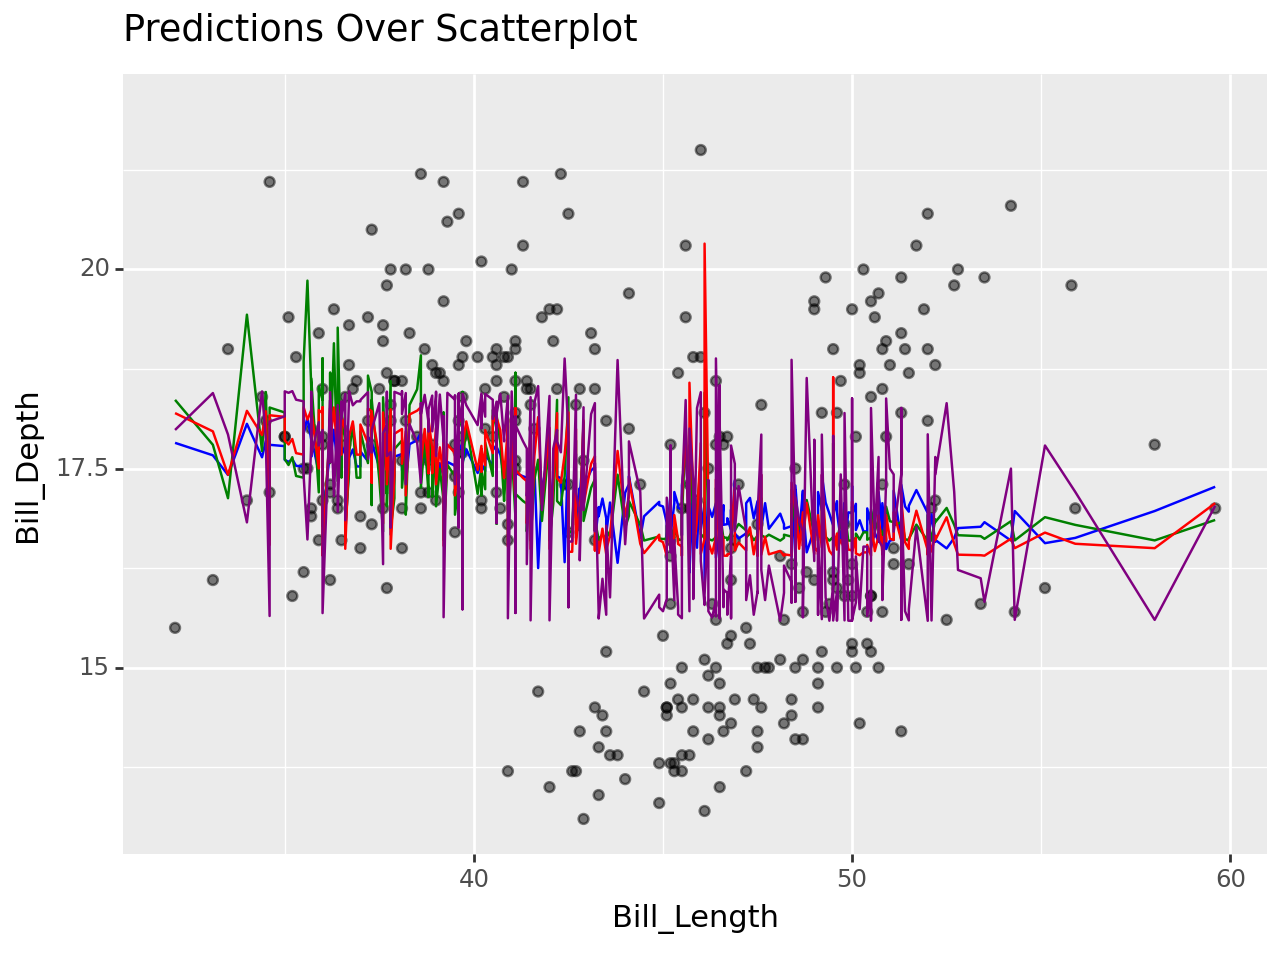

<Figure Size: (640 x 480)>

In [12]:
import plotnine
from plotnine import *
X = df['bill_length_mm']
y = df['bill_depth_mm']

plot = (
    ggplot(df, aes(y=y , x=X))
    +geom_point(alpha=0.5)
    +geom_line(predictions_df, aes(y=y_pred_lr), color = 'blue')
    +geom_line(predictions_df, aes(y=y_pred_quad), color = 'green')
    +geom_line(predictions_df, aes(y=y_pred_cube), color = 'red')
    +geom_line(predictions_df, aes(y=y_pred_ten), color = 'purple')
    +xlab("Bill_Length")
    +ylab("Bill_Depth")
    +ggtitle("Predictions Over Scatterplot")
)
plot

In [13]:
#using the mse to find the better model 
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y, y_pred_lr)

mse_quad = mean_squared_error(y, y_pred_quad)

mse_cube = mean_squared_error(y, y_pred_cube)

mse_ten = mean_squared_error(y, y_pred_ten)

print(mse_lr, mse_quad, mse_cube, mse_ten)


3.664155709957262 3.4427439201358223 3.336441096345579 2.765226841646878


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Considering the mean squared error across various models, the polynomial model of degree 10 emerges as the superior fit. However, the effectiveness as a predictor is questionable, as the assessment is based on the same dataset used for model training. A visual examination of the plot alone does not provide a clear indication of model performance.